In [4]:
import pandas as pd
pd.read_csv('combined_processed_RRM.csv', index_col=0).shape

(100651, 84)

In [44]:
import pandas as pd
hiddens=pd.read_csv('hiddens2.csv', index_col=0)

In [32]:
Orth = pd.read_csv('SequenceRecordClasses_SequenceRecordClassByRealtimeBasket_OldGroups.txt', sep='\t')
Orth = Orth.drop('Unnamed: 2', 1)

In [119]:
%rm ../data/tentative_genename_mapping.csv

In [58]:
import re
with open('../data/tentative_genename_mapping.tab', 'rb') as original_file:
    for i, line in enumerate(original_file):
        with open('../data/tentative_genename_mapping.csv', 'a') as new_file:
            line = re.sub(b'\t', b',', line)
            new_file.write(line.decode("utf-8") )

In [59]:
match = pd.read_csv('../data/tentative_genename_mapping.csv')

In [63]:
hiddens['name1'] = [name.split('.')[0] for name in hiddens.name]
match = pd.read_csv('../data/tentative_genename_mapping.csv')
matched = pd.merge(hiddens, match, left_on='name1', right_on='From')
matched.shape

(81843, 132)

In [171]:
import numpy as np
beginning, counts = np.unique([to.split('_')[0][:4] for to in matched['To']], return_counts=True)
name_count_pairs = sorted(zip(beginning, counts), key=lambda x: x[1], reverse=True)
genes_to_plot = [name for name, count in name_count_pairs]

In [137]:
[name_count_pair for name_count_pair in name_count_pairs if 'RBM' in name_count_pair[0]]

[('RBM19', 130),
 ('RBM45', 59),
 ('RBM47', 59),
 ('RBMS1', 58),
 ('RBM39', 51),
 ('RBM46', 51),
 ('RBM12', 45),
 ('RBM12B', 40),
 ('RBM28', 39),
 ('RBMS3', 37),
 ('RBM15', 35),
 ('RBM5', 35),
 ('RBM34', 32),
 ('RBM23', 26),
 ('RBM38', 26),
 ('RBM17', 24),
 ('RBM4', 24),
 ('RBM22', 23),
 ('RBM14', 22),
 ('RBM24', 21),
 ('RBM25', 21),
 ('RBMS2', 20),
 ('RBMX', 20),
 ('RBMX2', 20),
 ('RBM15B', 19),
 ('RBM18', 19),
 ('RBM41', 17),
 ('RBM8A', 15),
 ('RBM3', 14),
 ('RBM42', 14),
 ('RBM4B', 14),
 ('RBM11', 13),
 ('RBM7', 13),
 ('RBM10', 11),
 ('RBM44', 10),
 ('RBM26', 7),
 ('RBM14-RBM4', 2),
 ('RBM45-1', 2),
 ('RBMXL1', 2),
 ('RBMXL2', 2),
 ('RBM14L', 1),
 ('RBM27', 1),
 ('RBM41-1', 1),
 ('RBM7-1', 1),
 ('RBM8', 1),
 ('RBM9', 1),
 ('RBMX-1', 1),
 ('RBMXL3', 1),
 ('RBMY1A1', 1),
 ('RBMY1B', 1),
 ('RBMY1C', 1),
 ('RBMY1D', 1),
 ('RBMY1E', 1),
 ('RBMY1F', 1),
 ('RBMY1J', 1)]

In [174]:
gens2plot = sorted(['SRSF1', 
'MRD1', 
'TIAL1', 
'NONO', 
'NCL', 
'HNRNPM', 
'ELAVL1', 
'HNRNPR', 
'RBM12', 
'ELAVL4', 
'HNRNPH3', 
'CELF1', 
'PABPC4', 
'SYNCRIP', 
'PUF60', 
'NCLIV', 
'RBM12B', 
'PABPC1', 
'PABPC1L',
'PABPC5',
'ELAVL1',  'ELAVL2', 'ELAVL3', 'HNRNPH3',' HNRNPH3', 'HNRNPR', 'HNRNPM', 'HNRNPF','HNRNPH1', 'HNRNPLL', 'HNRNPD', 
             'HNRNPA0', 'HNRNPA2B1', 'HNRNPAB', 'HNRNPDL', 'HNRNPA3','RBM19', 'RBM45', 'RBM47', 'RBMS1', 'RBM39', 
             'RBM46', 'RBM12', 'RBM12B', 'RBM28', 'RBMS3', 'RBM15', 'RBM5', 'RBM34'])
gens2plot = ['SRSF1',
'MRD1', 
'TIAL1', 
'NONO',
'NCL',
'HNRNPM',
'ELAVL1',
'HNRNPR',
'RBM12',
'ELAVL4',
'HNRNPH3',
'CELF1',
'PABPC4',
'SYNCRIP',
'PUF60']

In [175]:
matched2plot = matched[[gen in gens2plot for gen in matched['To']]].sort_values('To')

In [177]:
# hiddens_to_plot = matched.loc[[gene in genes_to_plot for gene in matched['genID']], :].drop(
#     ['name','name1', 'From', 'To'], 1)
matched2plot = matched2plot.drop(['name','name1', 'From', 'genID'], 1)
matched2plot

ValueError: labels ['name' 'name1' 'From'] not contained in axis

In [86]:
sys.path.append('../util/')

In [172]:
matched.loc[:, 'genID'] = [name[:4] for name in matched['To']]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 837 / 837
[t-SNE] Mean sigma: 1.759493
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.231205
[t-SNE] Error after 250 iterations: 0.231205


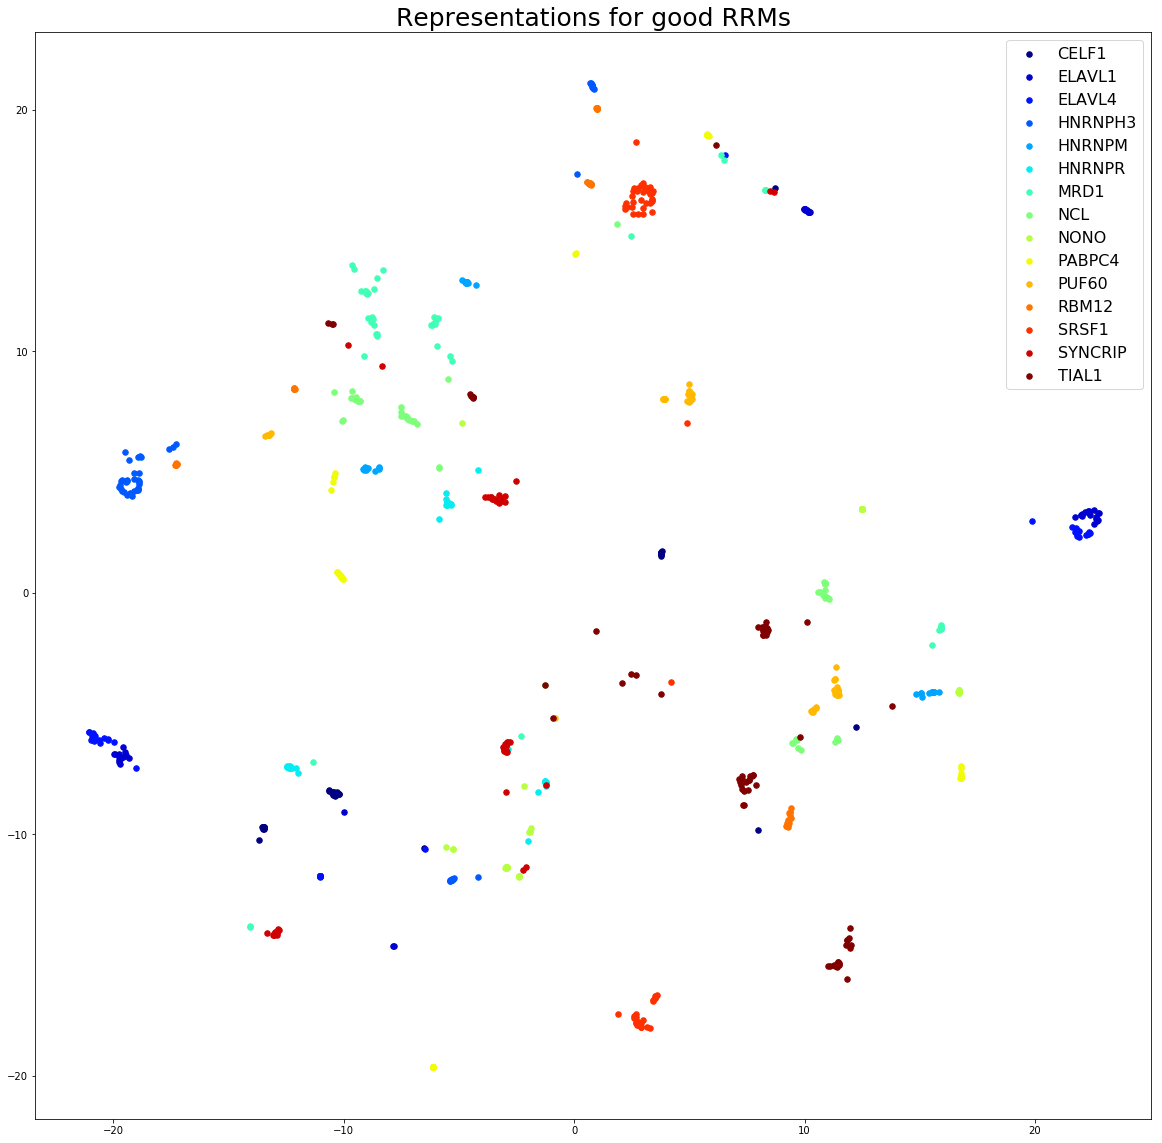

In [265]:
from imp import reload
import tsne
reload(tsne)
tsne.plot('Representations for good RRMs', matched2plot['To'], matched2plot.drop('To', 1).values, perplexity=100)

Using matplotlib backend: MacOSX
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 837 / 837
[t-SNE] Mean sigma: 1.759493
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.612838
[t-SNE] Error after 250 iterations: 0.612838


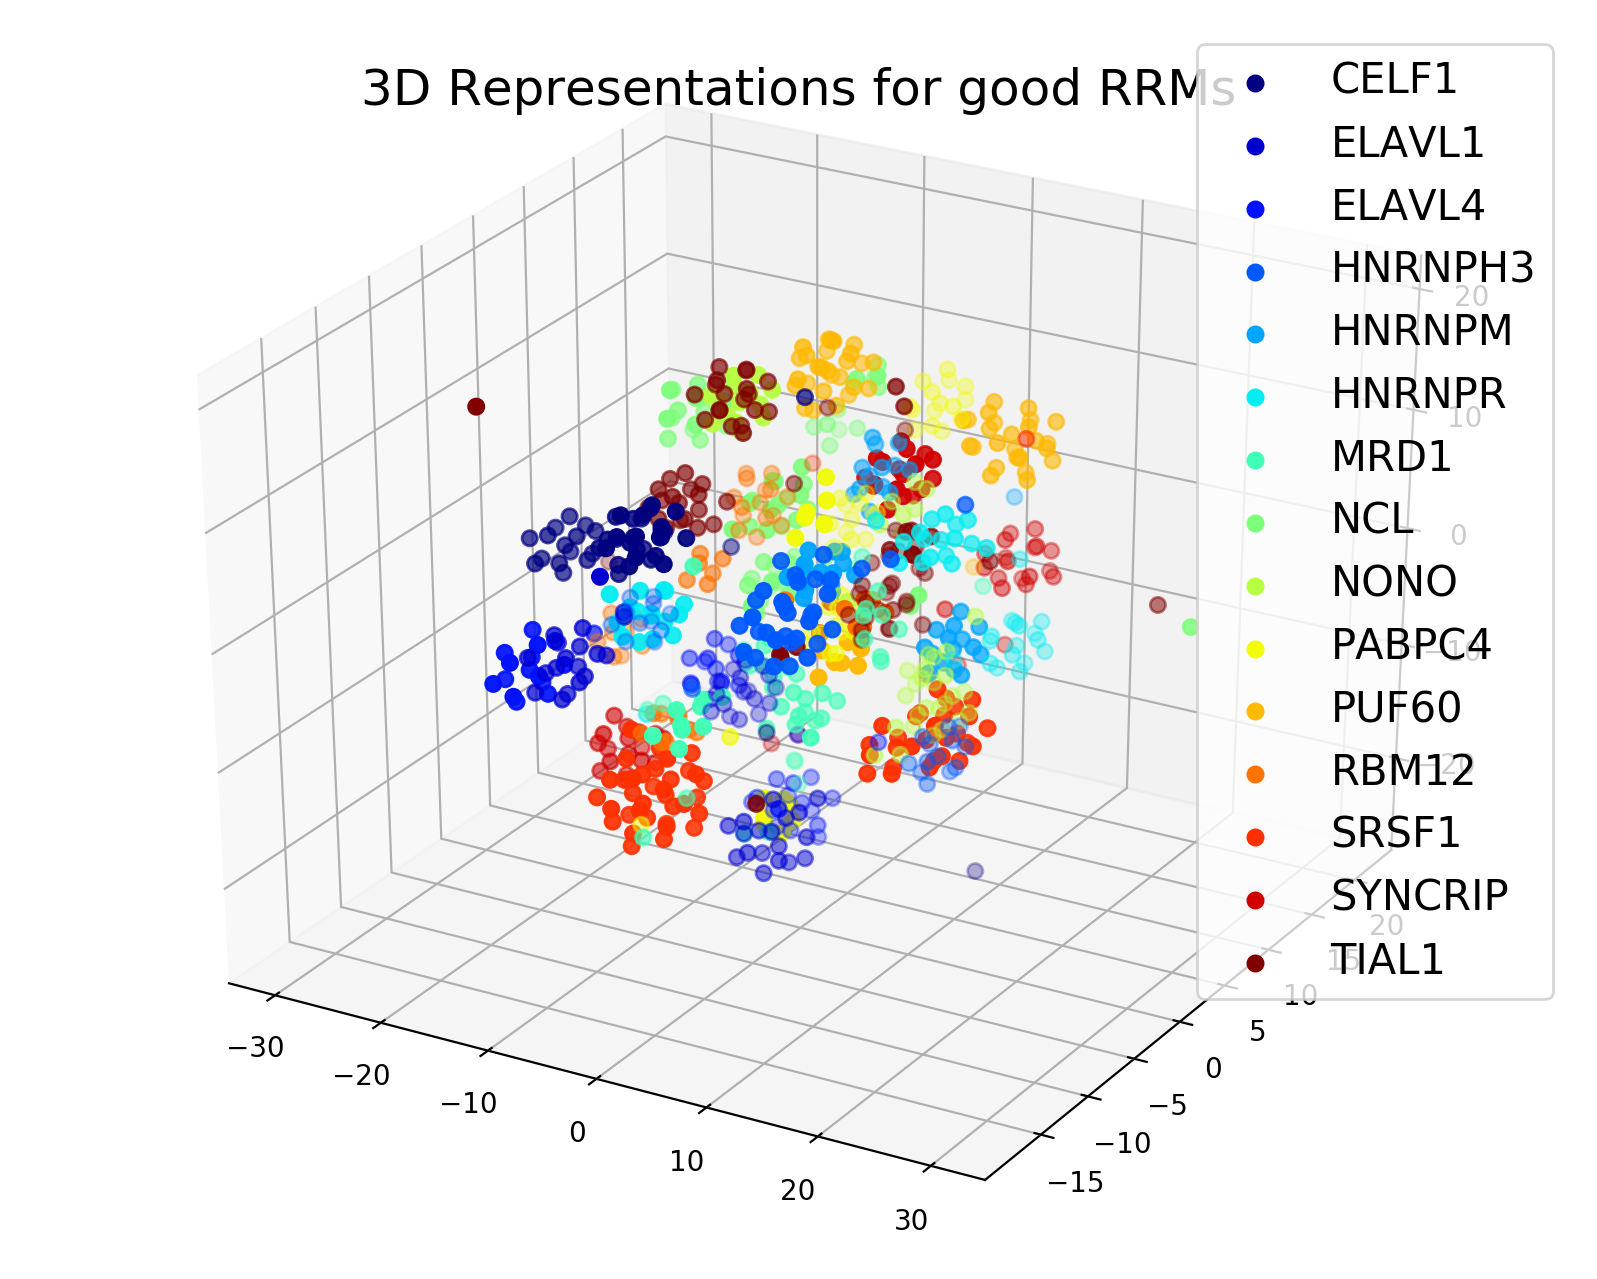

In [269]:
%matplotlib
reload(tsne)
tsne.plot3d('3D Representations for good RRMs', matched2plot['To'], matched2plot.drop('To', 1).values, perplexity=400)

In [280]:
hiddens1 = pd.read_csv('../../../../Downloads/hiddens.csv', index_col=0)

In [217]:
def txt_to_csv(raw_txt_path, sep=None):
    """parses txt file or fasta file into csv
    info_positions: list of positions populated beyond a threshold"""

    print('Parsing sequence input file...')

    dic = dict()
    name = None
    seq = None
    with open(raw_txt_path) as RRM:
        for i, line in enumerate(RRM):
            if '#' in line:
                pass
            else:
                name, seq = line.split(sep)
                name = name.replace('/', '_') # to distinguish from directory
                name = name.replace('>', '')
                seq = seq.replace('\n', '')
                # separator down the line
                dic.update([(name, seq)])

    df = pd.DataFrame(list(map(lambda x: list(x.upper()), list(dic.values()))), index=dic.keys())
    return df

def informative_positions(df, processed_RRM_path, filter_threshold=None, top_n=82, placeholder='-'):
    """rid of excessive placeholders, 
    keeping top_n most populated positions
    or filterout positions populated less than a threshold"""
    if top_n:
        print('Extracting top %d most populated positions...'%top_n)
    elif filter_threshold:
        print('Filtering out positions  more than %.2f%% populated...'%(filter_threshold*100))
    else:
        raise ValueError('either filter_threshold or top_n has to be a number.')
        
    populate_rate = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
    if top_n:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) \
                             if rate in sorted(populate_rate, reverse=True)[:top_n]]
    else:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) if rate > filter_threshold]
    
    print('keeping %d positions in sequence'%(len(positions_to_keep)+2))
    informative_values = list(map(lambda x: ['<start>'] + x.tolist() + ['<end>'], 
                                  df[positions_to_keep].values))
    df1 = pd.DataFrame(informative_values, index=df.index)
#     df1.to_csv(processed_RRM_path)
    print('Done! Filtered df output as %s'%processed_RRM_path)
    return populate_rate[positions_to_keep], positions_to_keep, df1

def preprocess(preprocessed, RRM_path, output_path, sep=' ', vocab=None):
    assert os.path.isfile(RRM_path), 'input RRM path: %s not found!' %(RRM_path)
    df = pd.read_csv(RRM_path, index_col=0)
    if not preprocessed:
        df = txt_to_csv(RRM_path)
        df= informative_positions(df, processed_RRM_path=output_path)
    if not vocab:
        vocab = build_vocab(df)
        return vocab, df
    else:
        return df
# df = preprocess(True, '../data/combined_processed.csv', '../data/combined_processed.csv' , vocab=vocab)

def _get_correct_dim(height):
    return np.floor((height-1)/2 + 1)


width = int(_get_correct_dim(_get_correct_dim(original_size - 4 - 2 - 2)))
width  = width - 4
threshold =.5/100
pop_rate, positions, RRM_df_filtered = informative_positions(RRM_df, None, filter_threshold=threshold, top_n=None)

NameError: name 'original_size' is not defined

In [501]:
original_size = RRM_df_filtered.shape[1]
def _get_correct_dim(height):
    return np.floor((height-1)/2 + 1)


width = int(_get_correct_dim(_get_correct_dim(original_size - 4 - 2 - 2)))
width  = width - 4

In [378]:
def train_test_split(df):
    np.random.seed(0)  # COMBINED DATA
    msk = np.random.rand(df.shape[0]) < .7
    df['index'] = df.index
    df[msk].loc[:,'index'].to_csv('../data/train_index.csv', index=False, header=False)
    test = df[~msk]
    test_msk = np.random.rand(test.shape[0]) < 1.0/3
    test[test_msk].loc[:,'index'].to_csv('../data/test_index.csv', index=False, header=False)
    test[~test_msk].loc[:,'index'].to_csv('../data/val_index.csv', index=False, header=False)
    df = df.drop('index', 1)
    return df
df = train_test_split(df)

In [424]:
RRM_df = txt_to_csv('../data/comineddata_nolinegaps_space_delim.fasta')

Parsing sequence input file...


In [584]:
len([ind for ind in RRM_df.index if '||' in ind])

719

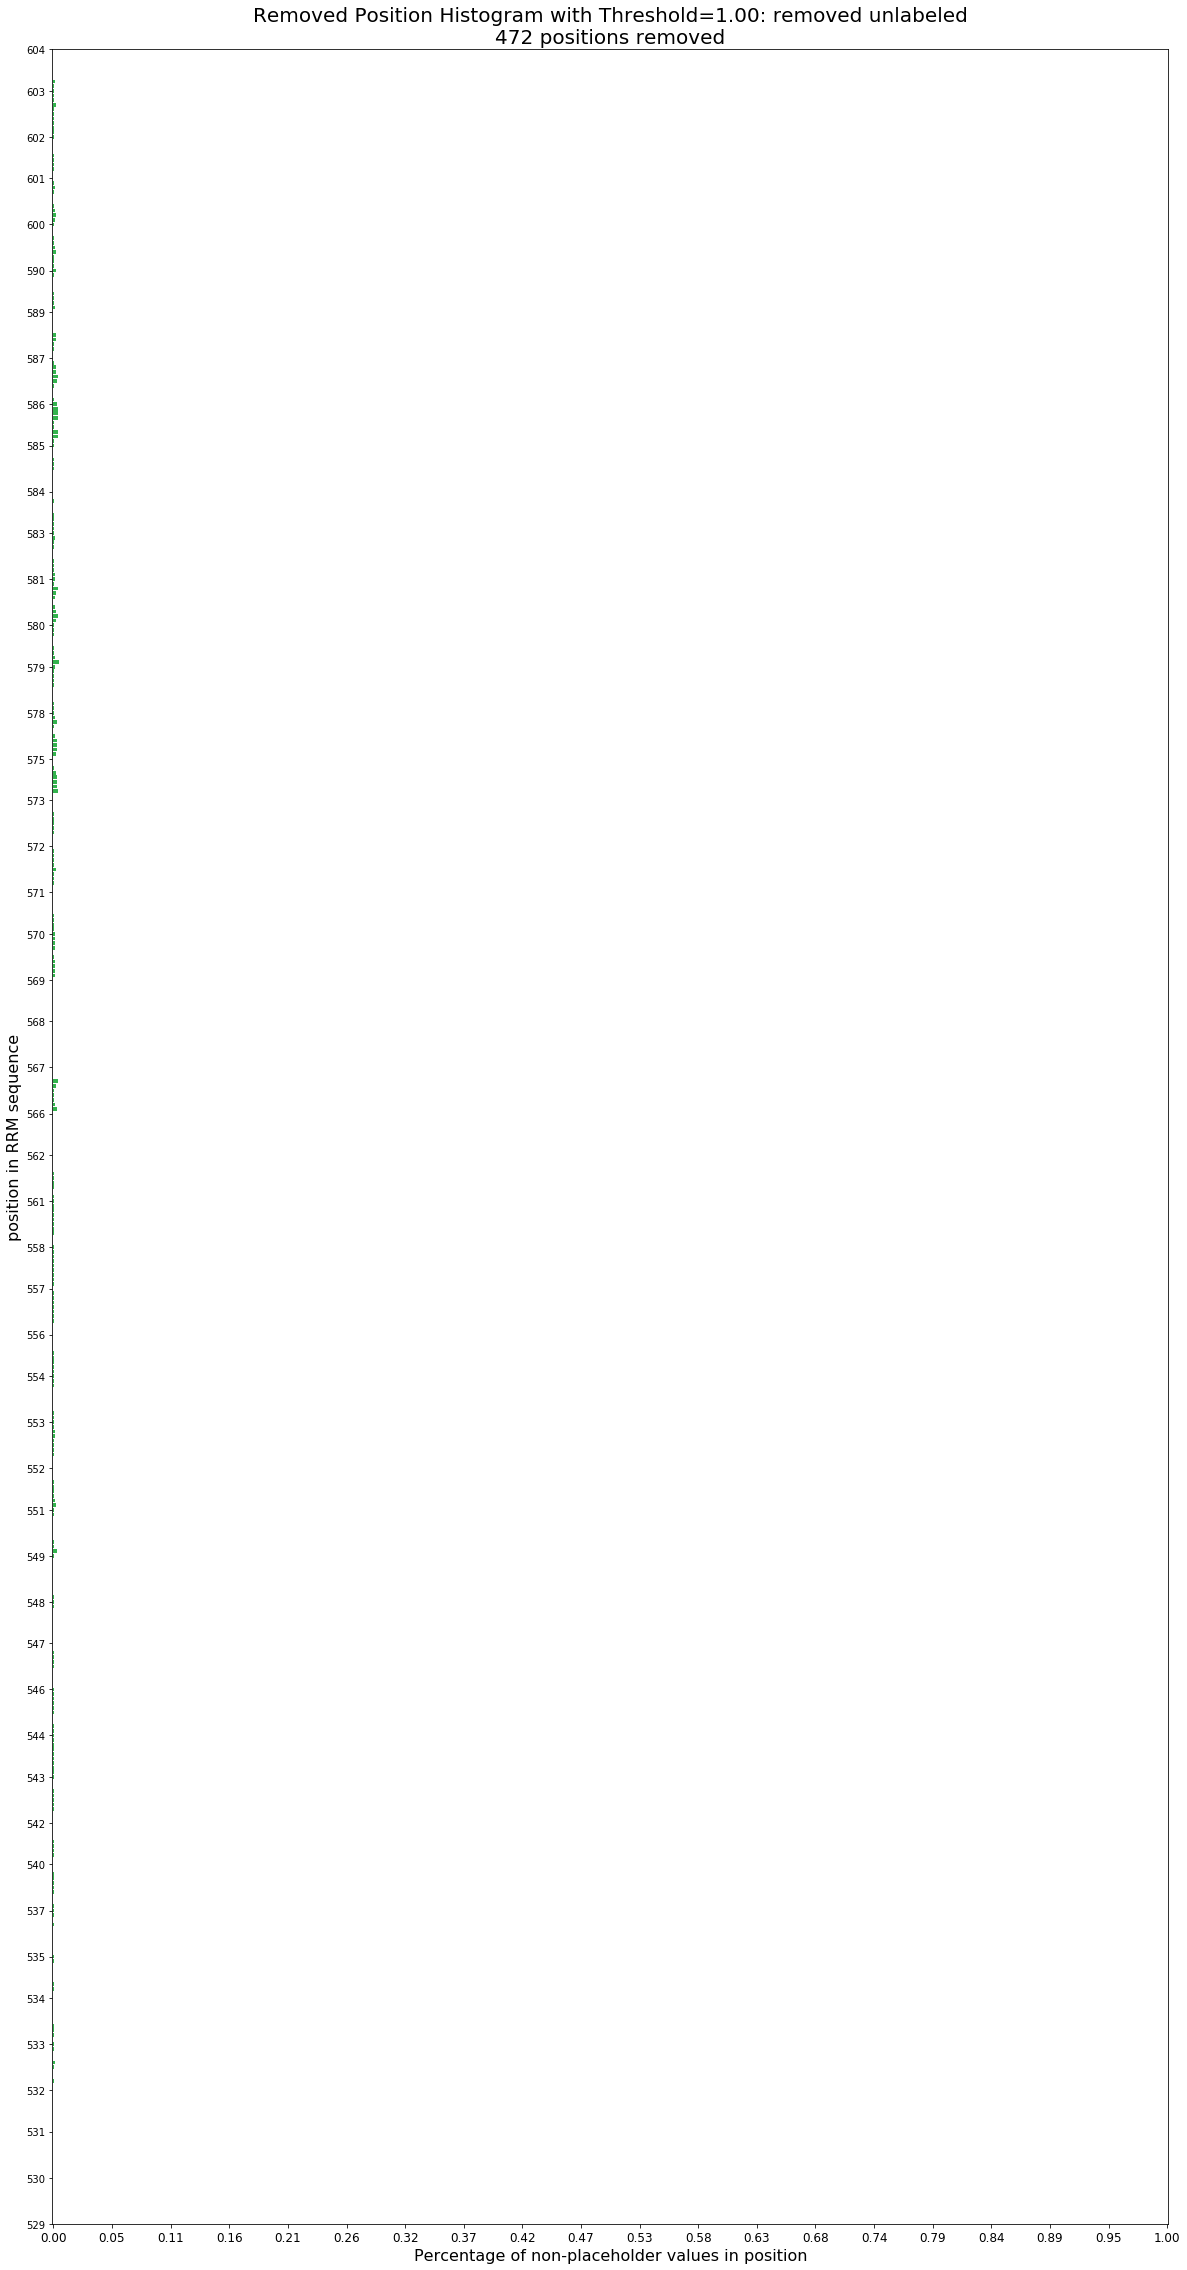

In [606]:
plot_labele_population(RRM_df, threshold, [pos for pos in np.arange(RRM_df.shape[1]) if pos not in positions], 
                      dataset='removed unlabeled')

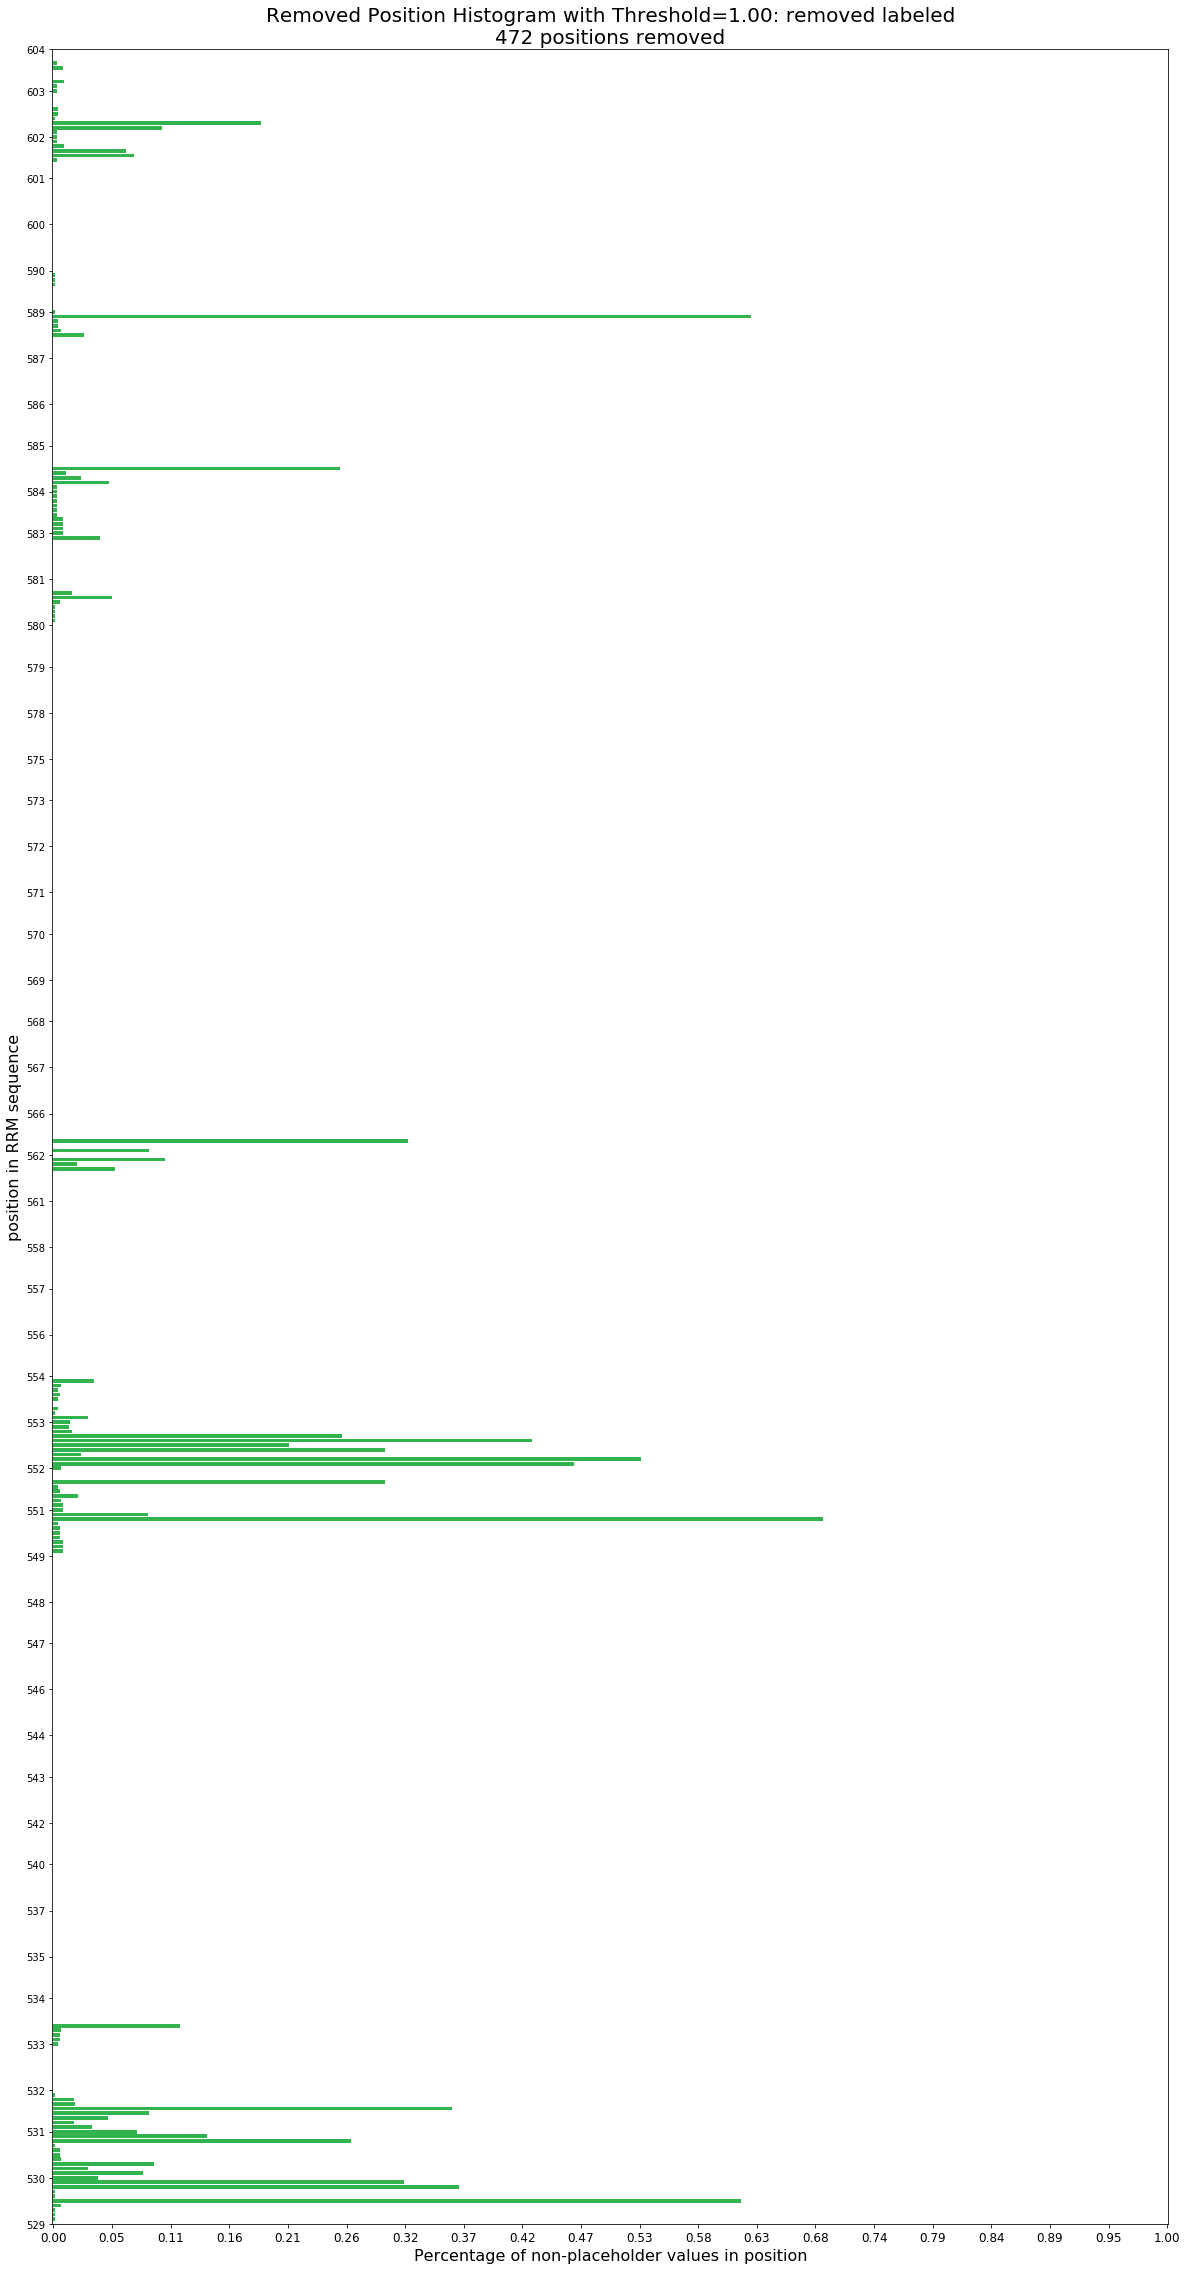

In [605]:
plot_labele_population(RRM_df, threshold, [pos for pos in np.arange(RRM_df.shape[1]) if pos not in positions], 
                      dataset='removed labeled')

In [594]:
'labaled' in 'whole dataset'.split(' ')

False

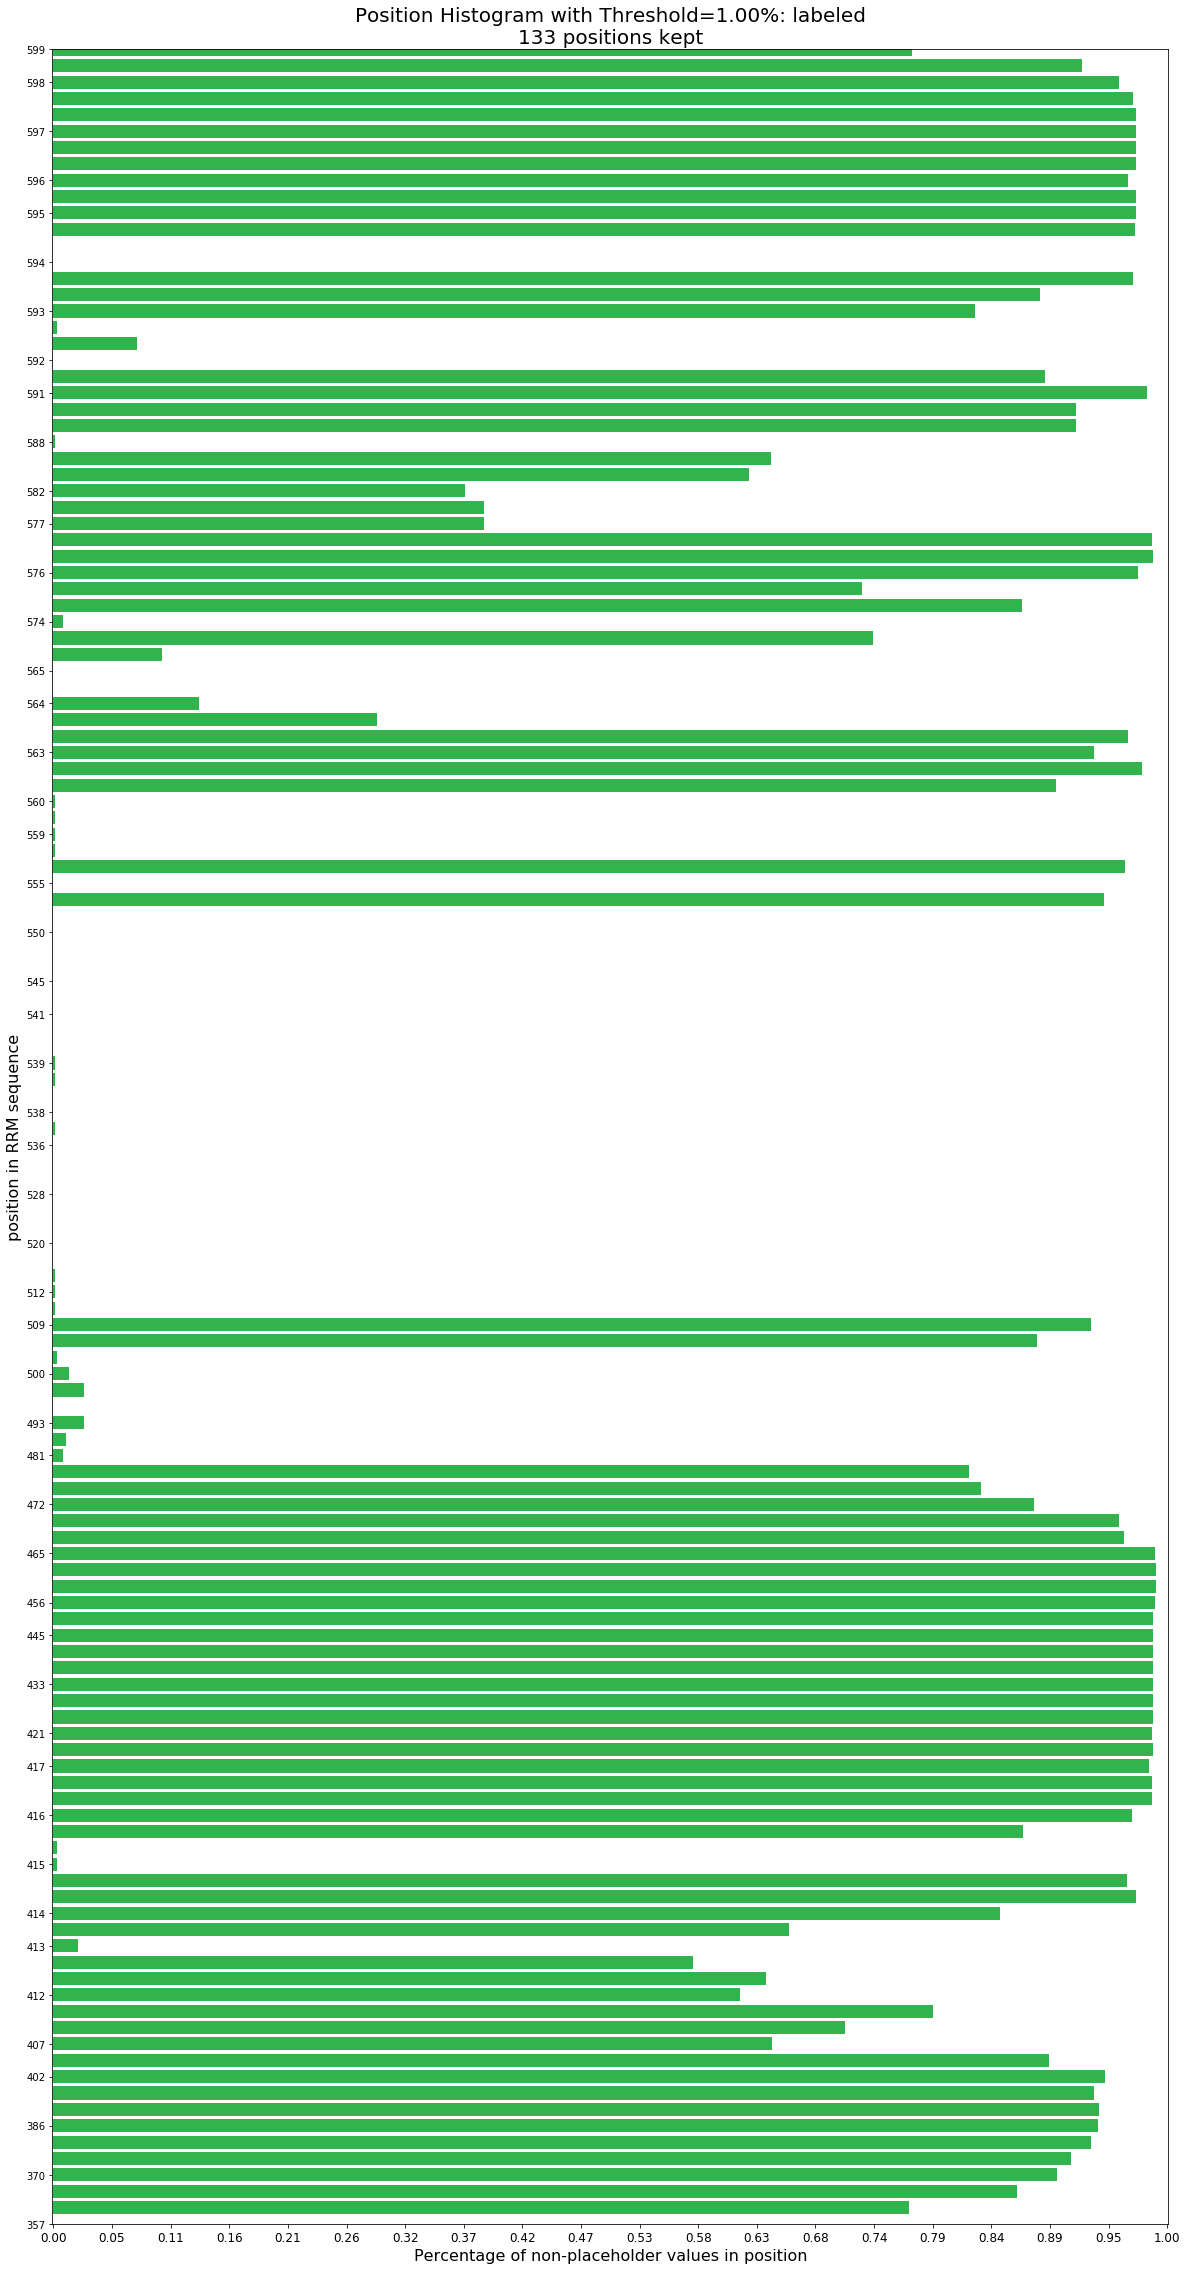

In [599]:
def plot_labele_population(df, threshold, positions, dataset):
    if 'labeled' in dataset.split(' '):
        ind = [ind for ind in df.index if '||' in ind]
    else:
        ind = [ind for ind in df.index if '||' not in ind]
    def get_population_rate(df, placeholder='-'):
        populate_num = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
        return populate_num
    
    labeled_pop_num = get_population_rate(df.loc[ind, :])[positions]        
    plot_num_population(threshold, labeled_pop_num, positions, dataset, color=[.2, .7, .3])

plot_labele_population(RRM_df, threshold, positions, dataset='labeled')

In [ ]:
plot_labele_population(RRM_df, threshold, positions)

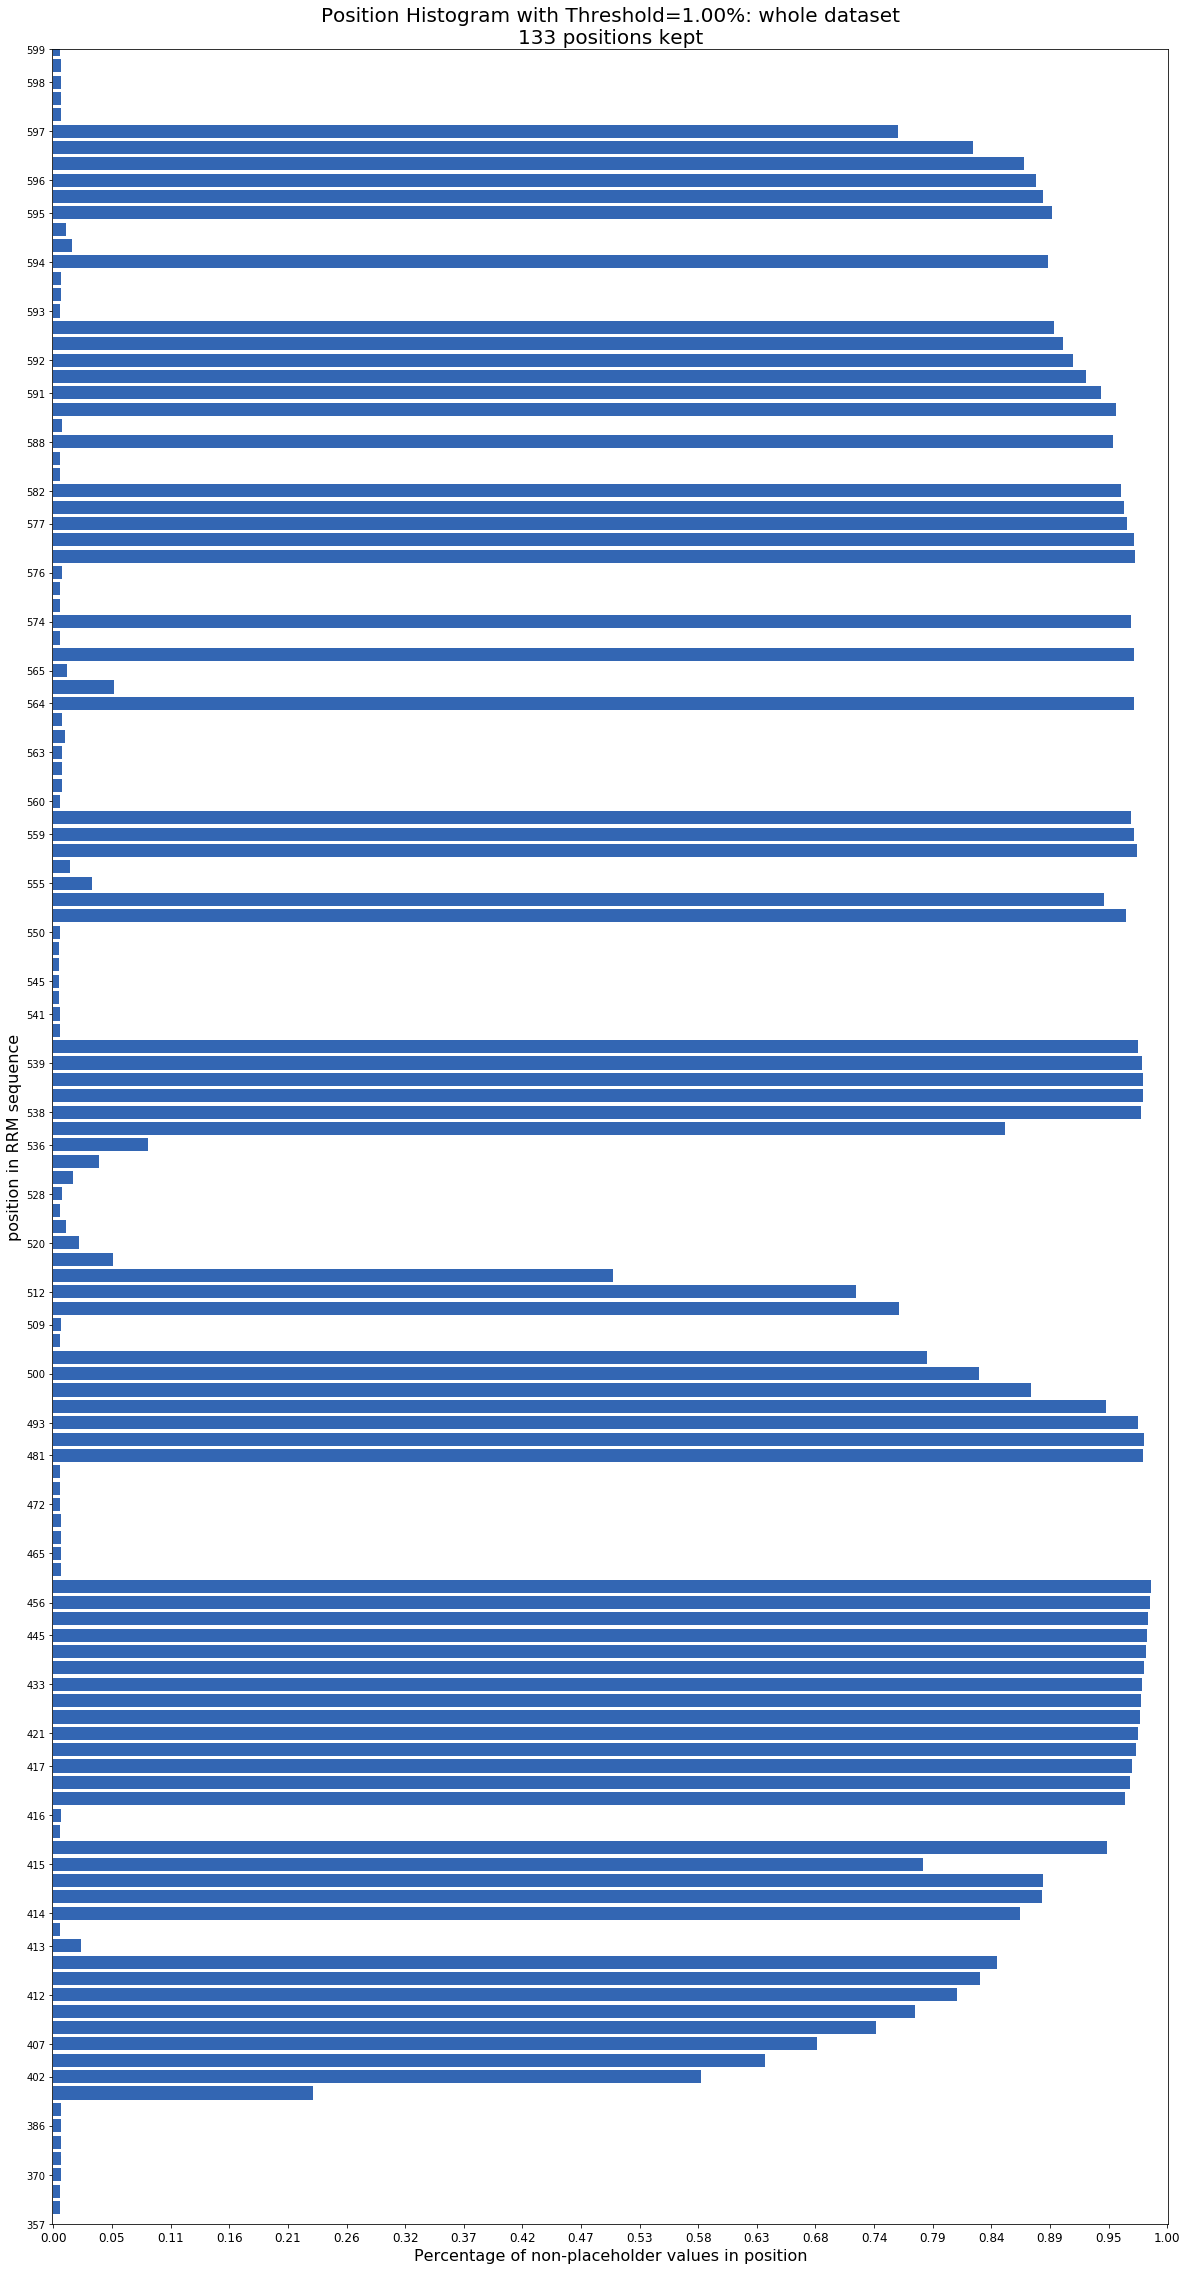

In [598]:
%matplotlib inline
import re
threshold = .01
def plot_num_population(threshold, pop_num, positions, dataset='whole dataset', color=[.2, .4, .7]):
    title = 'Position Histogram with Threshold=%.2f%%: %s\n%d positions kept'%(
        threshold*100, dataset, len(positions))
    if 'removed' in dataset:
        title = 'Removed Position Histogram with Threshold=%.2f: %s\n%d positions removed'%(
            threshold*100, dataset, len(positions))
    fig, ax = plt.subplots(figsize=(20, 40))
    y_pos = [np.floor(num) for num in np.linspace(0, len(pop_num), 50)]
    ax.barh(np.arange(0, len(pop_num)), pop_num, align='center', color=color)
    ax.invert_yaxis()
    ax.set_yticks(y_pos)
    ax.set_yticklabels(reversed(positions))
    ax.set_ylim([len(pop_num) + 1e-3, -1e-3])
    ax.set_ylabel('position in RRM sequence', fontsize=16)
    ax.set_xlabel('Percentage of non-placeholder values in position', fontsize=16)
    ax.set_xlim([-1e-3, 1+1e-3]) 
    x_pos = np.linspace(0, 1, 20)
    ax.set_xticks(x_pos)
    x_pos = ["%.2f"%num for num in x_pos]
    ax.set_xticklabels(x_pos, fontsize=12)
    plt.title(title, fontsize=20)
    plt.show()
    fig.savefig('%s.png'%re.sub(' ', '_', title))
plot_num_population(threshold, pop_rate, positions)  

In [428]:
RRM_df.shape

(100651, 605)

In [379]:
train_index = pd.read_csv('../data/train_index.csv',header=None).iloc[:,0]
val_index = pd.read_csv('../data/val_index.csv',header=None).iloc[:,0]
df.loc[train_index, :]

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
T080824||RNCMPT00434_RRM__0,<start>,V,F,L,G,G,V,-,-,-,...,-,-,-,-,-,-,-,-,-,<end>
T117424||RNCMPT00259_RRM__1,<start>,L,Y,I,K,H,L,-,-,-,...,-,I,-,-,G,S,P,I,H,<end>
T080738||RNCMPT00001_RRM__0,<start>,I,F,I,G,K,L,-,-,-,...,E,I,-,R,N,G,R,L,L,<end>
T105643||RNCMPT00482_RRM__0,<start>,V,Y,L,N,N,L,-,-,-,...,-,P,-,-,G,K,P,I,E,<end>
T002501||RNCMPT00309_RRM__0,<start>,V,Y,V,G,G,I,-,-,-,...,-,-,V,L,G,R,T,I,R,<end>
T080661||RNCMPT00004_RRM__0,<start>,L,F,I,G,Q,I,-,-,-,...,K,T,L,P,G,M,P,I,Q,<end>
T080792||RNCMPT00820_RRM__0,<start>,V,Y,V,G,S,I,-,-,-,...,V,M,L,G,G,R,N,I,K,<end>
T016928||RNCMPT00113_RRM__0,<start>,L,F,I,G,N,L,-,-,-,...,-,-,L,H,G,V,N,I,N,<end>
T016928||RNCMPT00052_RRM__0,<start>,L,F,I,G,N,L,-,-,-,...,-,-,L,H,G,V,N,I,N,<end>
T112023||RNCMPT00217_RRM__0,<start>,V,W,V,G,N,L,-,-,-,...,-,-,S,L,G,G,A,R,-,<end>
